In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

In [3]:
heart_data = pd.read_csv('./heart_disease_data.csv')

In [4]:
print("Null values in dataset:\n", heart_data.isnull().sum())

Null values in dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
print("Dataset statistics:\n", heart_data.describe())

Dataset statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std   

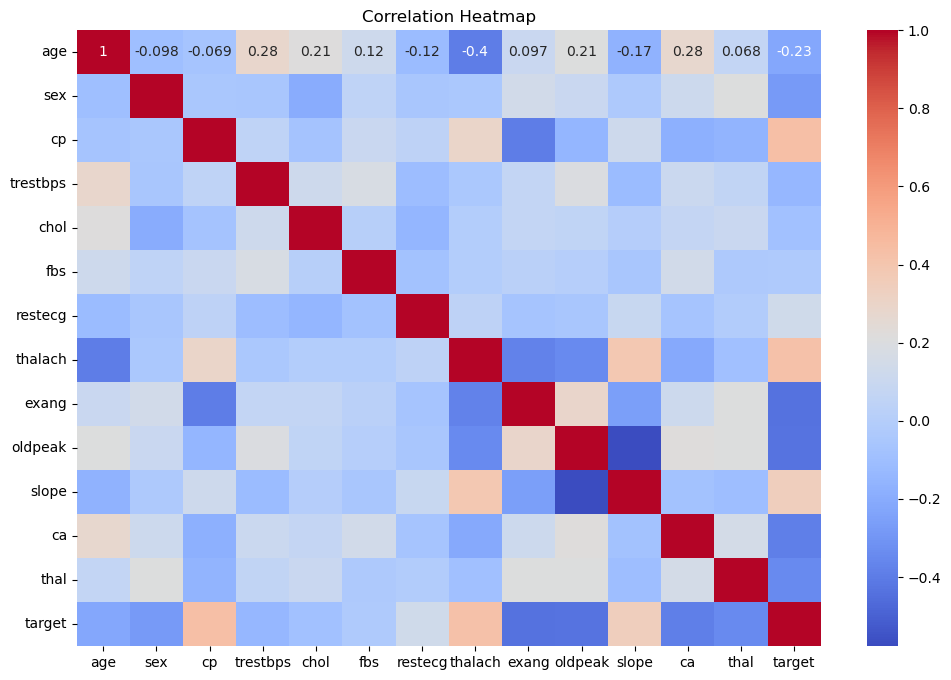

In [6]:
#this is for correlation heatmap. 
#it shows how much each feature is correlated woth each other.
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
#this is for splitting features and target variable.
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']


In [8]:
#this is for scalling the features.
scaler = StandardScaler()
x[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(
    x[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2, stratify=y
)
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Train shape: (212, 13), Test shape: (91, 13)


In [10]:
#for training the model.
model = LogisticRegression(max_iter=1000)  
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
#this is for training accuracy.
x_train_pred = model.predict(x_train)
train_acc = accuracy_score(x_train_pred, y_train)
print(f"Training accuracy: {train_acc * 100:.2f}%")

Training accuracy: 84.91%


In [12]:
#this is for testing accuracy.
x_test_pred = model.predict(x_test)
test_acc = accuracy_score(x_test_pred, y_test)
print(f"Testing accuracy: {test_acc * 100:.2f}%")

Testing accuracy: 84.62%


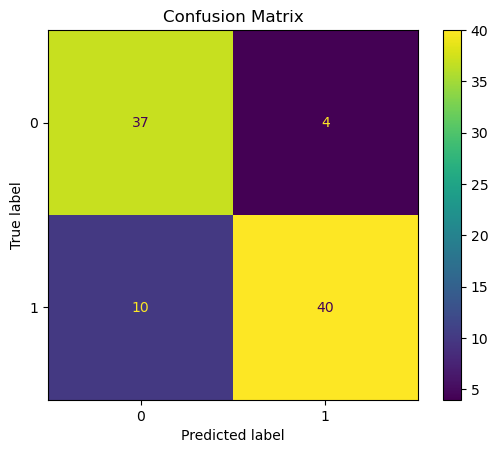

In [13]:
#this shows the confusion matrix.
cm = confusion_matrix(y_test, x_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

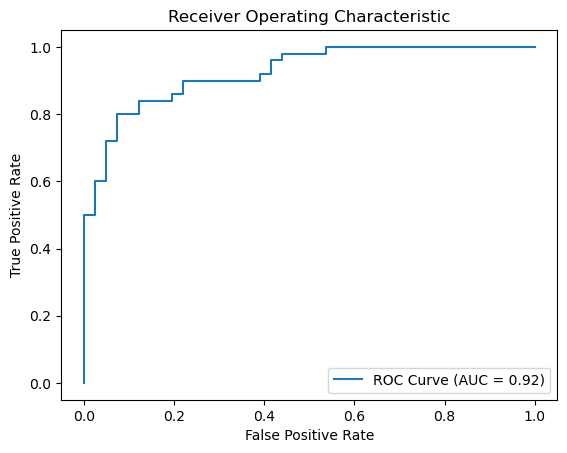

In [14]:
#this is for ROC curve.


y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

In [15]:
input_data = (62, 0, 0, 160, 164, 0, 0, 145, 0, 6.2, 0, 3, 3)

In [16]:
input_nparray = np.array(input_data)
input_data_reshape = input_nparray.reshape(1, -1)

In [21]:
# Scaling input data
input_data_scaled = input_data_reshape.copy()
input_data_scaled[:, [0, 3, 4, 7, 9]] = scaler.transform(input_data_reshape[:, [0, 3, 4, 7, 9]])

#this is for prediction.
prediction = model.predict(input_data_scaled)
prediction_prob = model.predict_proba(input_data_scaled)

print(f"Prediction: {prediction[0]}")
print(f"Probability of Heart Disease: {prediction_prob[0][1]:.2f}")

if prediction[0] == 0:
    print("The person does not have a heart disease.")
else:
    print("The person has a heart disease! Warning!")

Prediction: 0
Probability of Heart Disease: 0.00
The person does not have a heart disease.


c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
